## 💰 Sistema Bancário com Inteligência Financeira - Python

Este projeto simula um sistema bancário simples com funcionalidades modernas, como análise de gastos, sugestões de investimento, alertas inteligentes e inteligência adicional para auxiliar no controle financeiro. Uma solução moderna com análise financeira, gráficos sofisticados e assistência inteligente.

---

### 📌 Funcionalidades:
✅ **Gestão de transações bancárias** (depósito, saque e extrato bancário)  
✅ **Análise de gastos** com categorias  
✅ **Análises inteligentes** de comportamento financeiro  
✅ **Sugestões personalizadas** de economia e investimento  
✅ **Visualização gráfica** das movimentações, gráficos interativos e animações  
✅ **Alertas financeiros inteligentes**  

## 📋 Operações Bancárias

✅ Depósito realizado com sucesso.
❌ Valor excede o limite de R$ 500.00.
✅ Saque realizado com sucesso.
✅ Saque realizado com sucesso.
✅ Depósito realizado com sucesso.
✅ Saque realizado com sucesso.
❌ Limite de saques diários atingido.
❌ Valor inválido para depósito.

       EXTRATO BANCÁRIO
Depósito: R$ 5000.00
Saque:    R$ 500.00
Saque:    R$ 250.00
Depósito: R$ 1000.00
Saque:    R$ 400.00
------------------------------
Saldo atual |  R$    4850.00


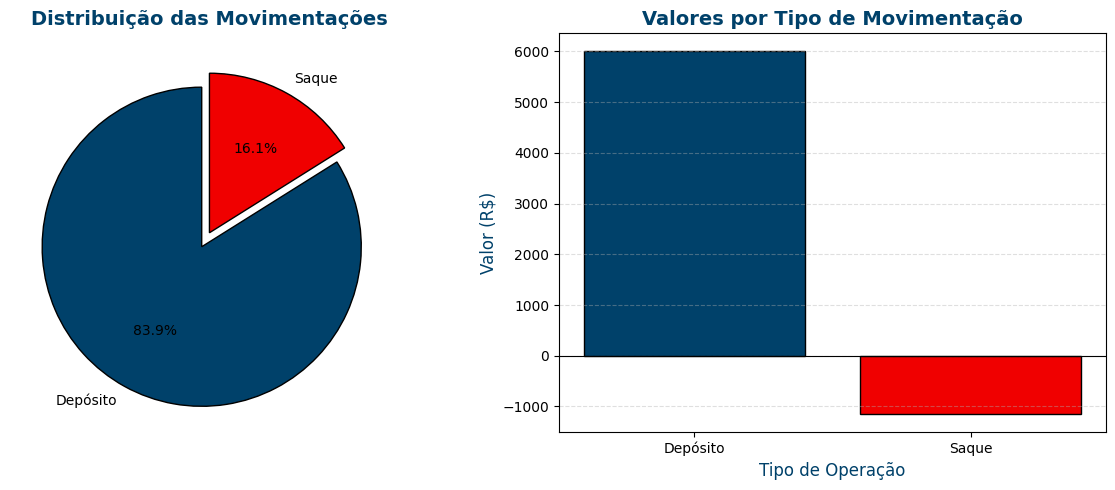

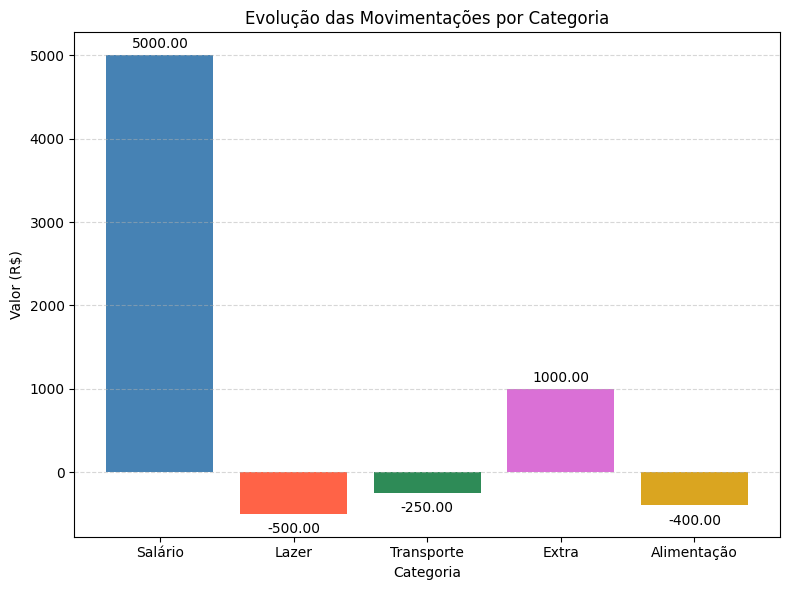


🧠 Assistente Financeiro
------------------------------
✅ Ótimo! Seus gastos estão equilibrados com seus depósitos.
🎯 Sugestão: reserve pelo menos R$ 970.00 como meta de economia futura.
📈 Se investir R$ 1455.00, você pode ganhar cerca de R$ 11.64 por mês.

💡 Sugestão de Investimentos
------------------------------
✅ Sugerimos dividir seu saldo da seguinte forma:
- 40% em Tesouro Direto ou CDB
- 30% em Fundos Multimercado
- 30% em Ações ou ETFs
👋 Saindo do sistema.


In [11]:
# ## 🏦 Sistema Bancário Inteligente

# Carrega bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Configurações iniciais
saldo = 0
limite = 500
extrato = []
numero_saques = 0
LIMITE_SAQUES = 3
movimentacoes = []

menu = """\n
🔹 [d] Depositar
🔹 [s] Sacar
🔹 [e] Extrato
🔹 [g] Gráfico Movimentações Categoria
🔹 [m] Gráfico Geral das Movimentações
🔹 [a] Assistente Financeiro
🔹 [i] Sugestão de Investimentos
🔹 [q] Sair

=> """

while True:
    opcao = input(menu)

    if opcao == "d":
        valor = float(input("Informe o valor do depósito: R$ "))
        categoria = input("Informe a categoria do depósito: ")

        if valor > 0:
            saldo += valor
            extrato.append(f"Depósito: R$ {valor:.2f}")
            movimentacoes.append({'Data': datetime.today(), 'Valor': valor, 'Tipo': 'Depósito', 'Categoria': categoria})
            print("✅ Depósito realizado com sucesso.")
        else:
            print("❌ Valor inválido para depósito.")

    elif opcao == "s":
        valor = float(input("Informe o valor do saque: R$ "))
        categoria = input("Informe a categoria do saque: ")

        excedeu_saldo = valor > saldo
        excedeu_limite = valor > limite
        excedeu_saques = numero_saques >= LIMITE_SAQUES

        if excedeu_saldo:
            print("❌ Saldo insuficiente.")
        elif excedeu_limite:
            print("❌ Valor excede o limite de R$ 500.00.")
        elif excedeu_saques:
            print("❌ Limite de saques diários atingido.")
        elif valor > 0:
            saldo -= valor
            extrato.append(f"Saque:    R$ {valor:.2f}")
            movimentacoes.append({'Data': datetime.today(), 'Valor': -valor, 'Tipo': 'Saque', 'Categoria': categoria})
            numero_saques += 1
            print("✅ Saque realizado com sucesso.")
        else:
            print("❌ Valor inválido para saque.")

    elif opcao == "e":
        HEADER = "\033[95m"
        OKGREEN = "\033[92m"
        FAIL = "\033[91m"
        OKBLUE = "\033[94m"
        WARNING = "\033[93m"
        ENDC = "\033[0m"
        BOLD = "\033[1m"

        print("\n" + HEADER + "="*30 + ENDC)
        print(BOLD + "       EXTRATO BANCÁRIO" + ENDC)
        print(HEADER + "="*30 + ENDC)
        if not extrato:
            print(WARNING + "Não foram realizadas movimentações." + ENDC)
        else:
            for item in extrato:
                if "Depósito" in item:
                    print(OKGREEN + item + ENDC)
                elif "Saque" in item:
                    print(FAIL + item + ENDC)
                else:
                    print(item)
        print(OKBLUE + "-"*30 + ENDC)
        print(BOLD + f"Saldo atual |  R$ {saldo:10.2f}" + ENDC)
        print(HEADER + "="*30 + ENDC)

    elif opcao == "g":
        df = pd.DataFrame(movimentacoes)

        if not df.empty:
            df_ordenado = df.drop_duplicates(subset="Categoria", keep="first")
            ordem_personalizada = df_ordenado["Categoria"].tolist()
            agrupado = df.groupby("Categoria")["Valor"].sum().reindex(ordem_personalizada)

            plt.figure(figsize=(8, 6))
            cores = ["steelblue", "tomato", "seagreen", "orchid", "goldenrod"]
            barras = plt.bar(agrupado.index, agrupado.values, color=cores[:len(agrupado)])

            plt.title("Evolução das Movimentações por Categoria")
            plt.xlabel("Categoria")
            plt.ylabel("Valor (R$)")
            plt.grid(axis="y", linestyle="--", alpha=0.5)
            for barra in barras:
                altura = barra.get_height()
                plt.text(
                    barra.get_x() + barra.get_width() / 2,
                    altura + 50 if altura >= 0 else altura - 100,
                    f"{altura:.2f}",
                    ha='center',
                    va='bottom' if altura >= 0 else 'top'
                )

            plt.tight_layout()
            plt.show()

        else:
            print("❌ Nenhuma movimentação registrada para gerar o gráfico.")

    elif opcao == "m":
        df = pd.DataFrame(movimentacoes)
        if not df.empty:
            df_pizza = df.copy()
            df_pizza["Valor"] = df_pizza["Valor"].abs()
            valores_pizza = df_pizza.groupby("Tipo")["Valor"].sum()
            valores_barra = df.groupby("Tipo")["Valor"].sum()
            cores_premium = ["#00416A", "#F00000"]
            explode = [0.1 if i == valores_pizza.idxmax() else 0 for i in valores_pizza.index]

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

            ax1.pie(valores_pizza,
                    labels=valores_pizza.index,
                    autopct="%1.1f%%",
                    startangle=90,
                    colors=cores_premium,
                    explode=explode,
                    wedgeprops={"edgecolor": "black"})
            ax1.set_title("Distribuição das Movimentações", fontsize=14, fontweight="bold", color="#00416A")

            ax2.bar(valores_barra.index,
                    valores_barra.values,
                    color=cores_premium,
                    edgecolor="black")
            ax2.set_title("Valores por Tipo de Movimentação", fontsize=14, fontweight="bold", color="#00416A")
            ax2.set_xlabel("Tipo de Operação", fontsize=12, color="#00416A")
            ax2.set_ylabel("Valor (R$)", fontsize=12, color="#00416A")
            ax2.axhline(0, color="black", linewidth=0.8)
            ax2.grid(axis="y", linestyle="--", alpha=0.4)
            ax2.set_xticks(range(len(valores_barra.index)))
            ax2.set_xticklabels(valores_barra.index, rotation=0)

            plt.tight_layout()
            plt.show()
        else:
            print("❌ Nenhuma movimentação registrada para gerar os gráficos.")

    elif opcao == "a":
        df = pd.DataFrame(movimentacoes)

        if not df.empty:
            df["Valor"] = df["Valor"].abs()
            total_depositos = df[df["Tipo"] == "Depósito"]["Valor"].sum()
            total_saques = df[df["Tipo"] == "Saque"]["Valor"].sum()
            saldo_atual = total_depositos - total_saques

            print("\n🧠 Assistente Financeiro")
            print("-" * 30)

            if total_saques > total_depositos * 0.6:
                print("⚠️ Você está gastando mais de 60% do que deposita. Considere rever seus gastos.")
            else:
                print("✅ Ótimo! Seus gastos estão equilibrados com seus depósitos.")

            meta_economia = saldo_atual * 0.2
            print(f"🎯 Sugestão: reserve pelo menos R$ {meta_economia:.2f} como meta de economia futura.")

            rentabilidade_mensal = 0.008
            valor_investido = saldo_atual * 0.3
            rendimento_estimado = valor_investido * rentabilidade_mensal
            print(f"📈 Se investir R$ {valor_investido:.2f}, você pode ganhar cerca de R$ {rendimento_estimado:.2f} por mês.")
        else:
            print("❌ Nenhuma movimentação registrada para análise financeira.")

    elif opcao == "i":
        df = pd.DataFrame(movimentacoes)

        if not df.empty:
            saldo_atual = df["Valor"].sum()

            print("\n💡 Sugestão de Investimentos")
            print("-" * 30)

            if saldo_atual > 1000:
                print("✅ Sugerimos dividir seu saldo da seguinte forma:")
                print("- 40% em Tesouro Direto ou CDB")
                print("- 30% em Fundos Multimercado")
                print("- 30% em Ações ou ETFs")
            else:
                print("⚠️ Saldo baixo. Recomendamos focar em redução de despesas.")
        else:
            print("❌ Nenhuma movimentação registrada para análise financeira.")

    elif opcao == "q":
        print("👋 Saindo do sistema.")
        break

    else:
        print("❌ Opção inválida.")


## 🚨 Alertas Financeiros Inteligentes

In [12]:
# Criando DataFrame com as movimentações
gastos = pd.DataFrame(movimentacoes)

# Filtrando apenas os saques do mês atual
gasto_mensal = gastos[(gastos["Data"].dt.month == datetime.today().month) & (gastos["Tipo"] == "Saque")]["Valor"].sum()

# Definindo limite de gastos
limite_gastos = 3000

if gasto_mensal > limite_gastos:
    print(f"🚨 ALERTA: Seus gastos do mês já somam R$ {gasto_mensal:.2f} e ultrapassaram o limite de R$ {limite_gastos}.")
else:
    print(f"✅ Gastos do mês sob controle: R$ {gasto_mensal:.2f}")

✅ Gastos do mês sob controle: R$ -1150.00


## 🤖 Robô Consultor em Ação

🤖💬 Calculando o melhor investimento...
🤖💬 Analisando mercado 📈...
🤖💬 Preparando a aplicação 🏦...
🤖✅ Investimento realizado com sucesso! 💰


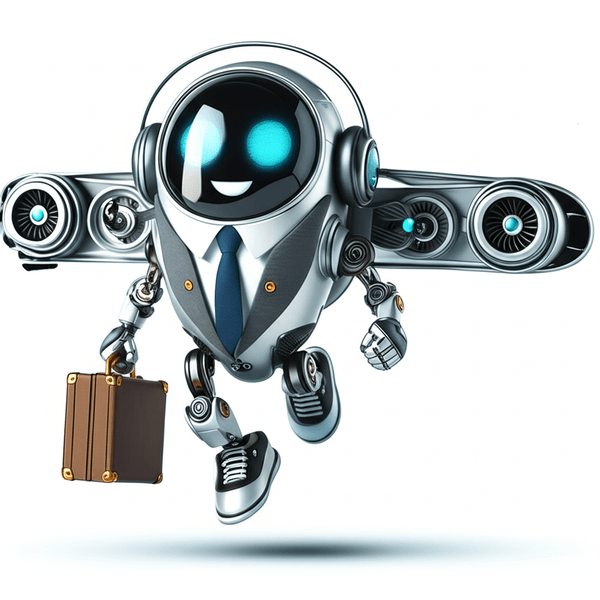

💰 Novo saldo disponível: R$ 4650.00


In [13]:
import os
import sys
import time

# Supondo que você tenha esta variável global
try:
    saldo
except NameError:
    saldo = 1000  # valor padrão caso esteja testando isoladamente

# Lista de movimentações usada pelo sistema
try:
    movimentacoes
except NameError:
    movimentacoes = []

# Função para exibir imagem compatível com notebook e .py
def exibir_imagem_compativel(caminho_imagem):
    try:
        if "ipykernel" in sys.modules:
            from IPython.display import display as notebook_display, Image as NotebookImage
            notebook_display(NotebookImage(filename=caminho_imagem))
        else:
            from PIL import Image as PILImage
            imagem = PILImage.open(caminho_imagem)
            imagem.show()
    except Exception as e:
        print(f"⚠️ Não foi possível exibir a imagem: {e}")

# Caminho da imagem (relativo à pasta raiz)
caminho_imagem = os.path.join("..", "imagens", "robozinho_consultor.png") if "ipykernel" in sys.modules else os.path.join("imagens", "robozinho_consultor.png")

# Interação com usuário
input("Pressione ENTER para receber uma sugestão do nosso 🤖 Robô Consultor")
aceitou = input("Você gostaria de investir R$ 200,00? (s/n): ").strip().lower()

if aceitou == 's':
    if saldo >= 200:
        print("🤖💬 Calculando o melhor investimento...")
        time.sleep(1.2)
        print("🤖💬 Analisando mercado 📈...")
        time.sleep(1.2)
        print("🤖💬 Preparando a aplicação 🏦...")
        time.sleep(1.2)
        print("🤖✅ Investimento realizado com sucesso! 💰")

        exibir_imagem_compativel(caminho_imagem)

        movimentacoes.append({
            "Data": datetime.today(),
            "Valor": -200,
            "Tipo": "Saque",
            "Categoria": "Investimento"
        })

        df = pd.DataFrame(movimentacoes)
        df["Valor"] = pd.to_numeric(df["Valor"], errors="coerce")
        df = df.dropna(subset=["Valor"])
        saldo = df["Valor"].sum()

        print(f"💰 Novo saldo disponível: R$ {saldo:.2f}")
    else:
        print("❌ Saldo insuficiente para realizar o investimento.")
else:
    print(f"✅ Seu saldo continua o mesmo: R$ {saldo:.2f}")

## ✅ Conclusão

Este sistema bancário demonstra como Python pode ser usado para simular operações financeiras, aplicar lógica de negócios e oferecer visualizações modernas. Com o auxílio de inteligência visual (robô consultor) e sugestões de investimento, o projeto vai além de um simples extrato, promovendo uma experiência de aprendizado prática e interativa.